In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

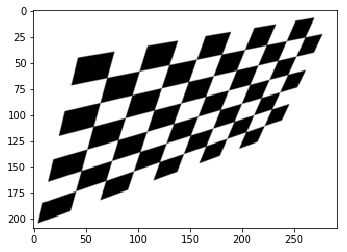

In [3]:
#Read in the image
image = cv2.imread('D:/images/d8.png')

#make a copy of the image
image_copy = np.copy(image)

#change color to RGB from BGR
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

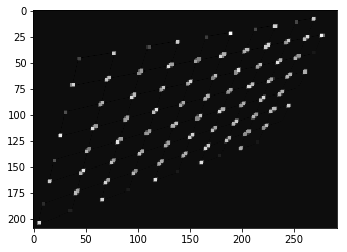

In [7]:
#DETECT CORNERS

#convert to gray scale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

#convert to float type
gray = np.float32(gray)

#detect corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

#Dilate corner image to enhance corner points
dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap='gray')

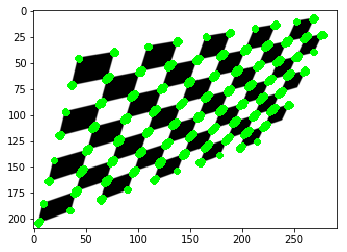

In [11]:
#SELECT AND DISPLAY STRONG CORNERS

#define a threshold for extracting strong corners
#This value may vary depending on the image
thresh = 0.01*dst.max()

#create an image copy to draw corners on
corner_image = np.copy(image_copy)

#Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            #image, center pt, radius, color, thickness
            cv2.circle(corner_image, (i,j), 2, (0, 255, 0), 1)

plt.imshow(corner_image)